In [1]:
import tensorflow as tf
import numpy as np
import seaborn as sns

In [33]:
## THE LINEAR EQUATION => Y = WX + b

## Define hyperparameters
lr = 0.01
epochs = 1000 ## number of times to go through the entire data
display_step = 50

In [5]:
## Generate Training Data

train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

n_samples = train_X.shape
n_samples

(17,)

In [7]:
## define the graph

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)


## define W, b parameters of the model
W = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')


In [34]:
## Construct the linear model


## Basically define our output when we give X and Y as input

pred = tf.add(tf.multiply(X,W), b)

## define our loss (RMSE here)

loss = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

## define our optimizer (Gradient Descent in this case)

optimizer = tf.train.GradientDescentOptimizer(lr).minimize(loss)



Epoch #50 loss=0.181270033121109 W=0.304330050945282 b=0.3601515591144562
Epoch #100 loss=0.17121092975139618 W=0.2909519374370575 b=0.459664911031723
Epoch #150 loss=0.16510622203350067 W=0.2805478274822235 b=0.5370568037033081
Epoch #200 loss=0.16139791905879974 W=0.27245646715164185 b=0.5972448587417603
Epoch #250 loss=0.15914253890514374 W=0.26616358757019043 b=0.6440544724464417
Epoch #300 loss=0.15776866674423218 W=0.26126953959465027 b=0.6804593205451965
Epoch #350 loss=0.15693023800849915 W=0.2574634850025177 b=0.7087706923484802
Epoch #400 loss=0.15641726553440094 W=0.2545034885406494 b=0.7307885885238647
Epoch #450 loss=0.15610240399837494 W=0.252201646566391 b=0.7479111552238464
Epoch #500 loss=0.155908465385437 W=0.2504114806652069 b=0.7612273693084717
Epoch #550 loss=0.1557883322238922 W=0.24901925027370453 b=0.7715837359428406
Epoch #600 loss=0.15571355819702148 W=0.24793647229671478 b=0.7796379327774048
Epoch #650 loss=0.15566669404506683 W=0.24709437787532806 b=0.785901

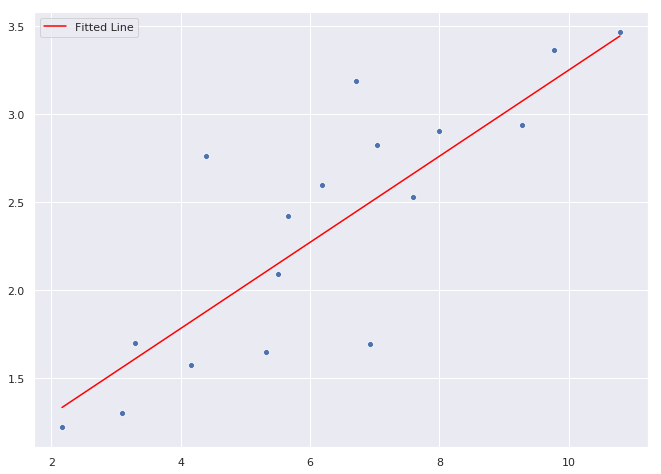

In [36]:
## initializing our variables of the model(Which we have to train)

init = tf.global_variables_initializer()


## For plotting
sns.set(rc={'figure.figsize':(11,8)})


## Execute the graph you've made
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        for(x,y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        ## Display loss on full dataset per 50th step
        if(epoch+1)%display_step == 0:
            c = sess.run(loss, feed_dict={X:train_X, Y:train_Y})
            print("Epoch #{}".format(epoch+1), "loss={}".format(c[0]), "W={}".format(sess.run(W)), "b={}".format(sess.run(b)))
    print("Optimization Finished")
    final_loss = sess.run(loss, feed_dict={X:train_X, Y:train_Y})
    print("Final Training Loss:{}".format(final_loss[0]), "W={}".format(sess.run(W)), "b={}".format(sess.run(b)))
    
    sns.scatterplot(train_X, train_Y)
    sns.lineplot(train_X, train_X*sess.run(W) + sess.run(b), color='red', label='Fitted Line')